In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_path = "D:/Документы/__NCFU/datasets/Churn_Modelling.csv"
data = pd.read_csv(data_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


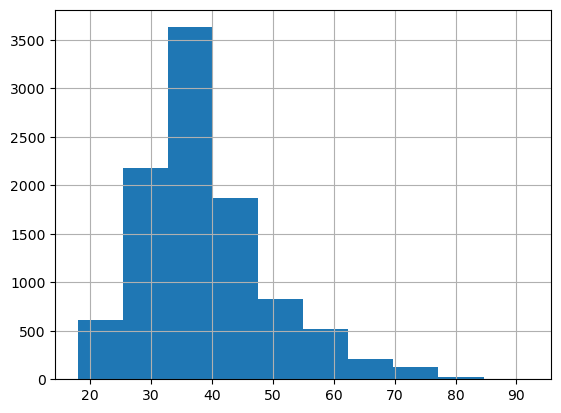

In [5]:
data['Age'].hist();

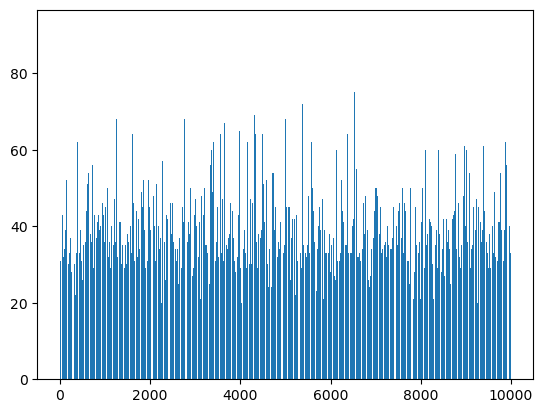

In [6]:
plt.bar(data.index, data['Age'])
plt.show()

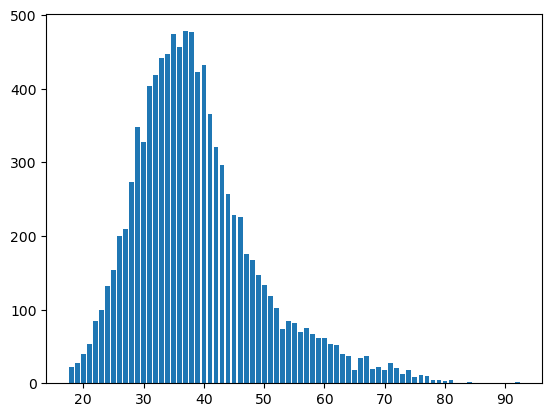

In [7]:
hist = data['Age'].value_counts()
plt.bar(hist.index, hist);

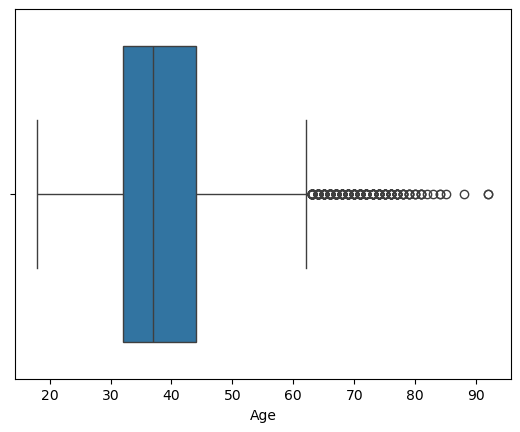

In [8]:
sns.boxplot(x=data['Age']);

C:\Users\dsoko\AppData\Local\Temp\ipykernel_404\2248671891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Geography',


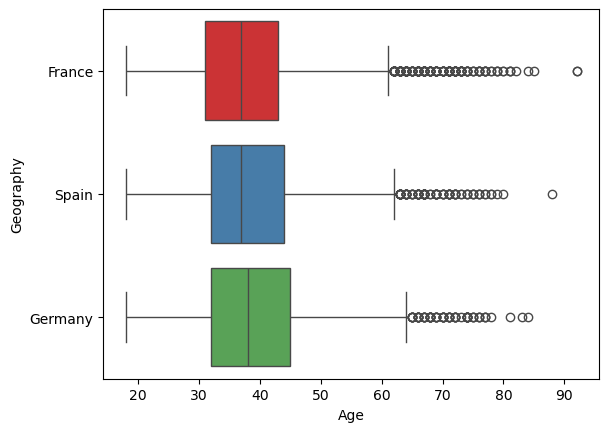

In [9]:
top_data = data[['Geography', 'Age']]
top_data = top_data.groupby('Geography').sum()
top_data = top_data.sort_values('Age',ascending=False)
top_data = top_data[:5].index.values
sns.boxplot(y='Geography',
            x='Age',
            data=data[data.Geography.isin(top_data)], palette='Set1');

C:\Users\dsoko\AppData\Local\Temp\ipykernel_404\3722450480.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['NumOfProducts'], palette='Set1')


<Axes: xlabel='NumOfProducts', ylabel='count'>

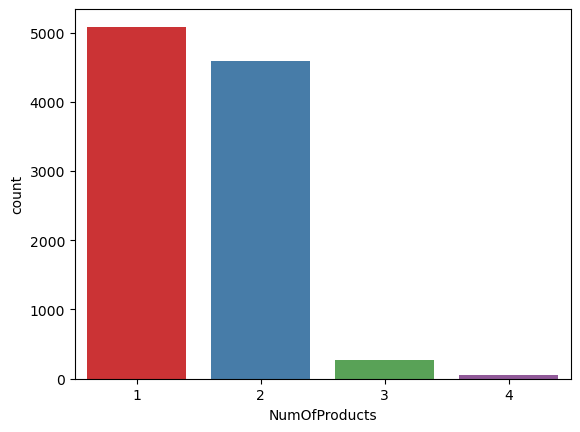

In [10]:
sns.countplot(x=data['NumOfProducts'], palette='Set1')

C:\Users\dsoko\AppData\Local\Temp\ipykernel_404\3547953880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[data['Geography'].isin(data['Geography'].\


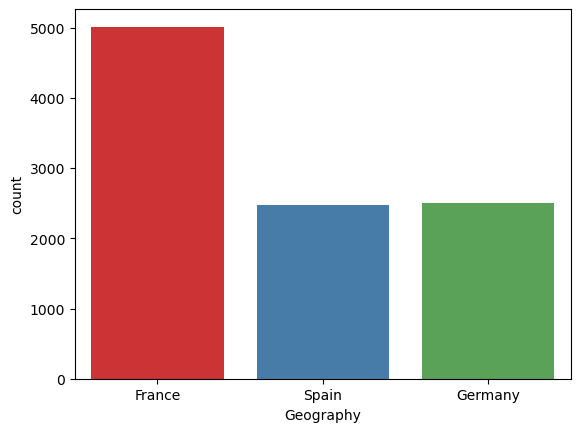

In [11]:
sns.countplot(x=data[data['Geography'].isin(data['Geography'].\
                                      value_counts().head(5).index)]['Geography'], palette='Set1');

In [12]:
feats = ['CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Age', 'Tenure']
feats

['CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Age', 'Tenure']

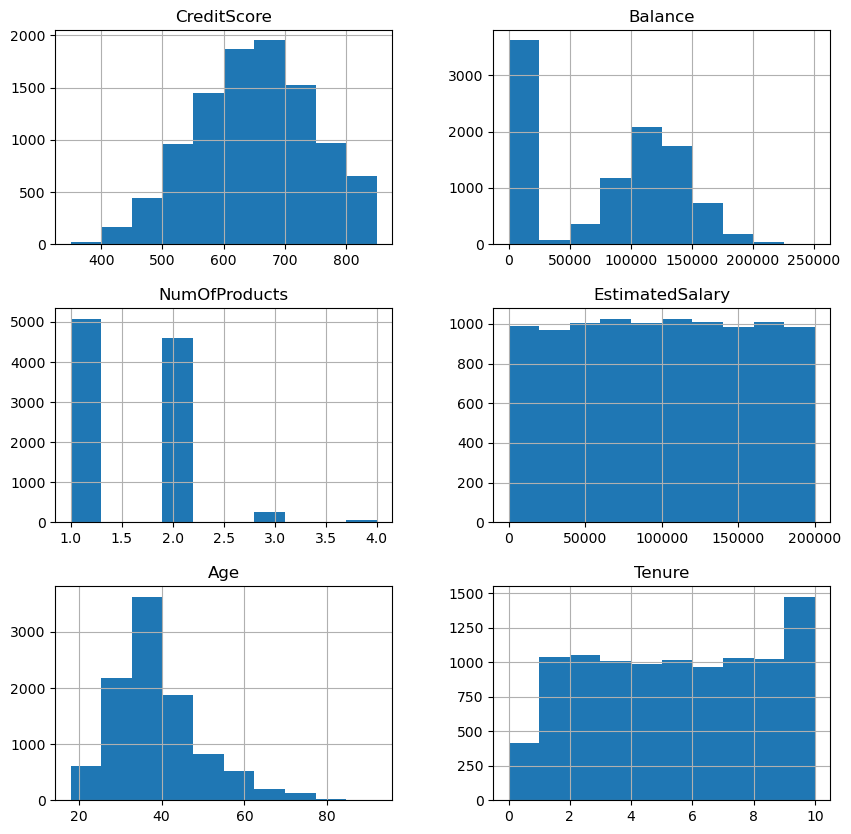

In [23]:
data[feats].hist(figsize=(10,10));

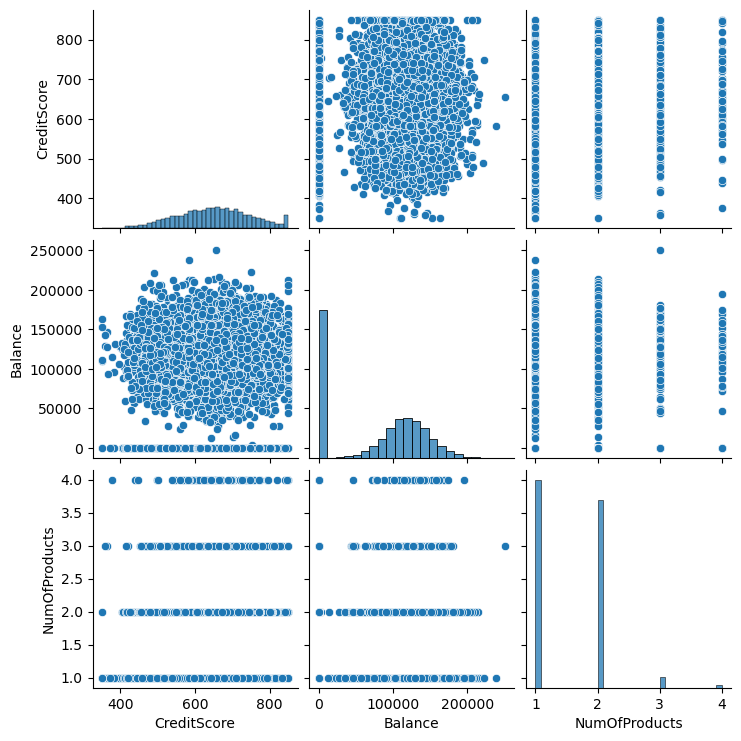

In [14]:
sns.pairplot(data[feats[:3]]);

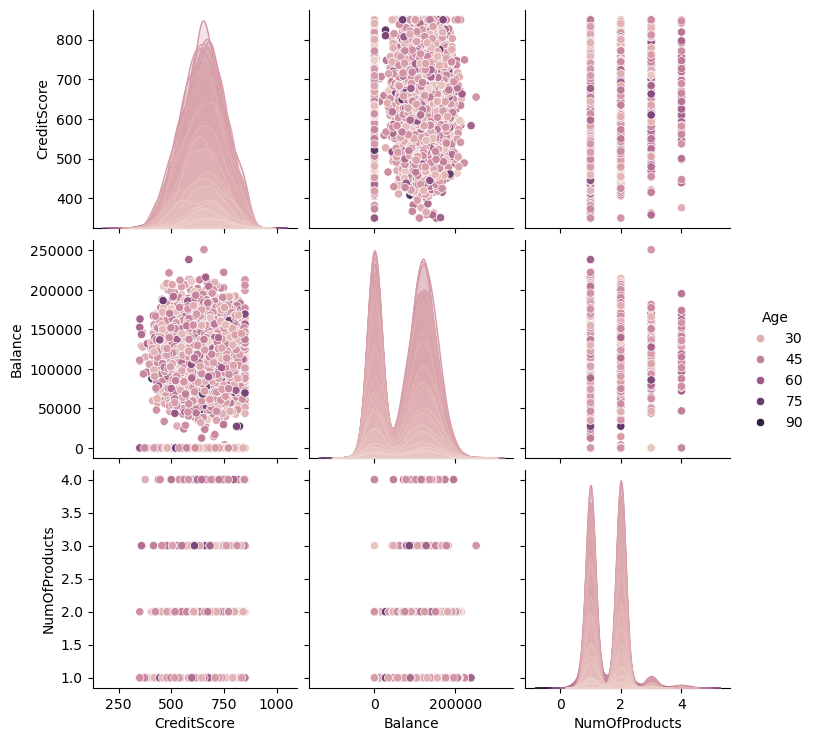

In [15]:
sns.pairplot(data[feats[:3] + ['Age']], hue='Age');

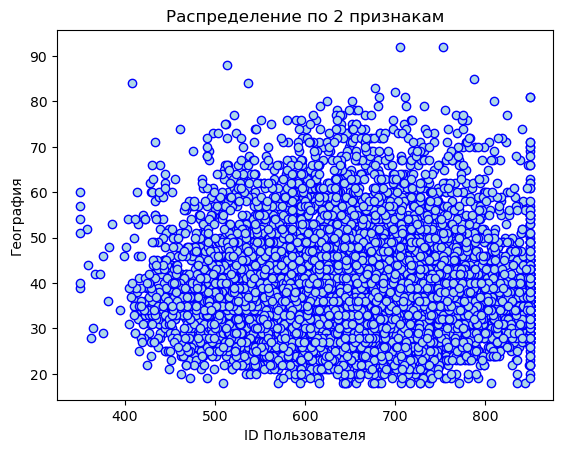

In [22]:
plt.scatter(data['CreditScore'],
            data['Age'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Возраст')
plt.title('Распределение по 2 признакам');

Text(0, 0.5, 'Balance')

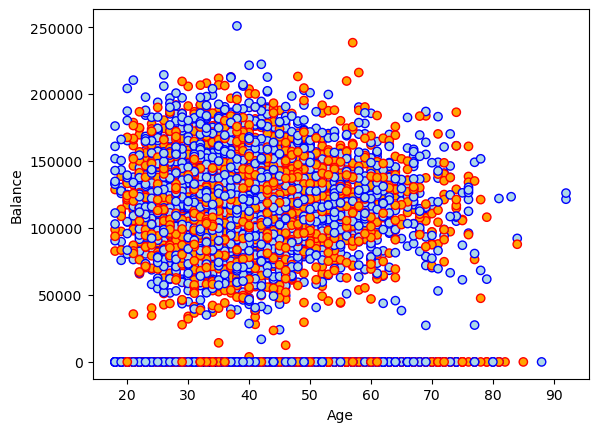

In [25]:
c = data['Gender'].map({'Male': 'lightblue', 'Female': 'orange'})
edge_c = data['Gender'].map({'Male': 'blue', 'Female': 'red'})
plt.scatter(
    data['Age'], data['Balance'],
    color=c,
    edgecolors=edge_c
)
plt.xlabel('Age')
plt.ylabel('Balance')

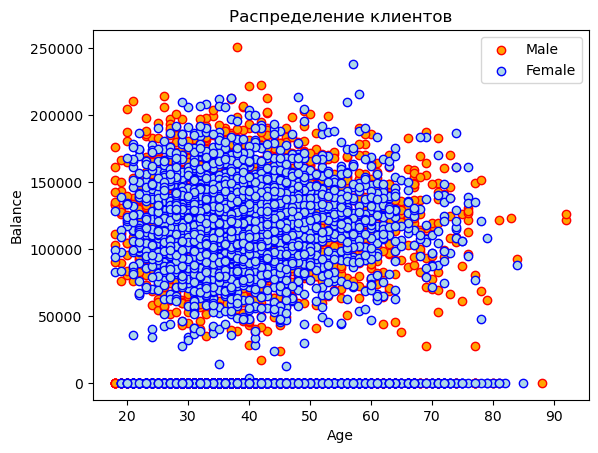

In [27]:
data_cat1 = data[data['Gender'] == 'Male']
data_cat2 = data[data['Gender'] == 'Female']

plt.scatter(data_cat1['Age'],
            data_cat1['Balance'],
            color='orange',
            edgecolors='red',
            label='Male')

plt.scatter(data_cat2['Age'],
            data_cat2['Balance'],
            color='lightblue',
            edgecolors='blue',
            label='Female')

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Распределение клиентов')
plt.legend();

<Axes: >

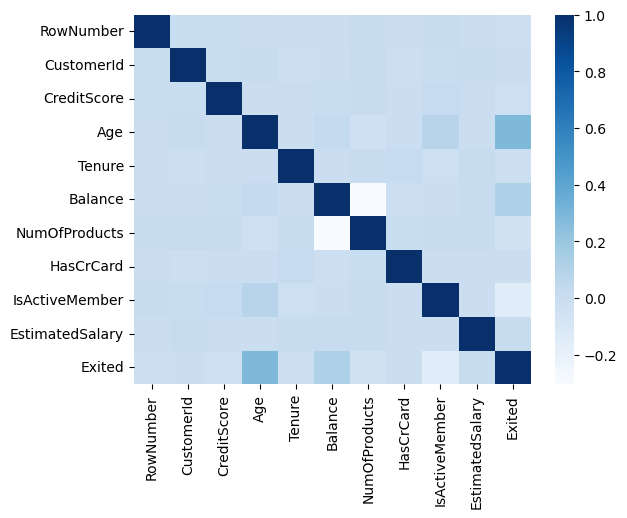

In [28]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.Blues)